In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [4]:
import pandas as pd
import numpy as np

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

%matplotlib inline

In [6]:
col_list = ['iyear', 'imonth','iday','extended','provstate','latitude','longitude','specificity','vicinity','crit1','crit2','crit3','doubtterr',
'multiple', 'natlty1','propextent','ishostkid','ransom','country','city','gname','individual','nkillus','nkillter','nwound','nwoundus',
'nwoundte','property','targtype1','suicide','success','weaptype1','region','attacktype1']

df = pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks 2/Terrorist Prediction/Global Terrorist.csv', usecols=col_list, encoding='ISO-8859-1')
df.head()

,iyear,imonth,iday,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,1970,7,2,0,58,2,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,14,58.0,MANO-D,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0,0.0
1,1970,0,0,0,130,1,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,7,21.0,23rd of September Communist League,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,1.0,1.0
2,1970,1,0,0,160,5,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,10,217.0,Unknown,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0,0.0
3,1970,1,0,0,78,8,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,7,217.0,Unknown,0,6,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0
4,1970,1,0,0,101,4,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,7,217.0,Unknown,0,8,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  int64  
 1   imonth       181691 non-null  int64  
 2   iday         181691 non-null  int64  
 3   extended     181691 non-null  int64  
 4   country      181691 non-null  int64  
 5   region       181691 non-null  int64  
 6   provstate    181270 non-null  object 
 7   city         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  specificity  181685 non-null  float64
 11  vicinity     181691 non-null  int64  
 12  crit1        181691 non-null  int64  
 13  crit2        181691 non-null  int64  
 14  crit3        181691 non-null  int64  
 15  doubtterr    181690 non-null  float64
 16  multiple     181690 non-null  float64
 17  success      181691 non-null  int64  
 18  suicide      181691 non-

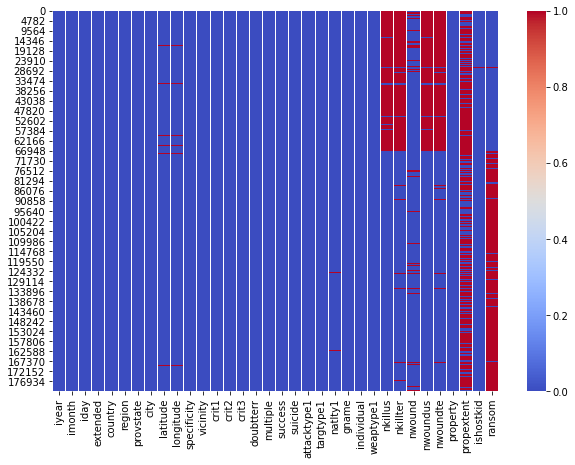

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cmap='coolwarm')

1. Selecting a column according to they have arraged in dataset 
2. The Provstate, city and gname column are categorical column, so we deal with later
3. The latitude,longitude columns we delete from the dataset

In [9]:
df=df.drop(['latitude','longitude'],axis=1)
df.head()

,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,1970,7,2,0,58,2,NaN,Santo Domingo,1.0,0,1,1,1,0.0,0.0,1,0,1,14,58.0,MANO-D,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0,0.0
1,1970,0,0,0,130,1,Federal,Mexico city,1.0,0,1,1,1,0.0,0.0,1,0,6,7,21.0,23rd of September Communist League,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,1.0,1.0
2,1970,1,0,0,160,5,Tarlac,Unknown,4.0,0,1,1,1,0.0,0.0,1,0,1,10,217.0,Unknown,0,13,NaN,NaN,0.0,NaN,NaN,0,NaN,0.0,0.0
3,1970,1,0,0,78,8,Attica,Athens,1.0,0,1,1,1,0.0,0.0,1,0,3,7,217.0,Unknown,0,6,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0
4,1970,1,0,0,101,4,Fukouka,Fukouka,1.0,0,1,1,1,-9.0,0.0,1,0,7,7,217.0,Unknown,0,8,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,0.0


We are dealing with the **SPECIFICITY** columns

In [14]:
df.specificity.value_counts()

1.0    144996
3.0     14615
2.0      8990
4.0      8534
5.0      4550
Name: specificity, dtype: int64

In [11]:
df.specificity.any()

True

In [13]:
df.specificity.isnull().sum()

6

In [15]:
df['specificity']=df['specificity'].fillna(1.0)

We are dealing with **DOUBTTER** & **MULTIPLE** columns

In [19]:
df.doubtterr.isnull().sum()

1

In [20]:
df.multiple.isnull().sum()

1

In [21]:
df.doubtterr.value_counts()

 0.0    138905
 1.0     29001
-9.0     13784
Name: doubtterr, dtype: int64

In [22]:
df.multiple.value_counts()

0.0    156658
1.0     25032
Name: multiple, dtype: int64

In [23]:
df['doubtterr']=df['doubtterr'].fillna(1.0)
df['multiple']=df['multiple'].fillna(1.0)

We are dealing with **NATLTY1** columns

In [26]:
df.natlty1.isnull().sum()

1559

In [27]:
df.natlty1.mean()

127.68644105433793

In [28]:
df.natlty1.median()

101.0

In [29]:
df.natlty1.mode()

0    95.0
dtype: float64

In [30]:
df.natlty1.value_counts()

95.0     24113
153.0    13900
92.0     12098
4.0      10931
45.0      7922
         ...  
349.0        1
351.0        1
169.0        1
79.0         1
605.0        1
Name: natlty1, Length: 215, dtype: int64

In [33]:
df['natlty1']=df['natlty1'].fillna(df['natlty1'].mode()[0])

We are dealing with **NKILLUS** columns

In [35]:
df.nkillus.value_counts()

0.0       116344
1.0          589
2.0          159
3.0           53
4.0           32
5.0           20
6.0           12
7.0            4
17.0           3
9.0            3
15.0           3
60.0           2
8.0            2
13.0           2
20.0           1
10.0           1
31.0           1
44.0           1
14.0           1
182.0          1
241.0          1
168.0          1
1327.0         1
19.0           1
30.0           1
38.0           1
1360.0         1
12.0           1
189.0          1
16.0           1
11.0           1
Name: nkillus, dtype: int64

In [36]:
df.nkillus.isnull().sum()

64446

In [37]:
df.nkillus.isnull().any()

True

In [38]:
df['nkillus']=df['nkillus'].fillna(0)

In [39]:
df.nkillus.isnull().any()

False

We are dealing with **NKILLTER** columns

In [40]:
df.nkillter.value_counts()

0.0      101532
1.0        6630
2.0        1930
3.0        1139
4.0         699
          ...  
86.0          1
156.0         1
301.0         1
300.0         1
110.0         1
Name: nkillter, Length: 96, dtype: int64

In [41]:
df.nkillter.isnull().sum()

66958

In [42]:
df.nkillter.isnull().any()

True

In [43]:
df['nkillter']=df['nkillter'].fillna(0)

In [44]:
df.nkillter.isnull().any()

False

We are dealing with **NWOUND** columns

In [45]:
df.nwound.value_counts()

0.0       103275
1.0        16033
2.0        10219
3.0         7303
4.0         4880
           ...  
1272.0         1
184.0          1
163.0          1
319.0          1
8191.0         1
Name: nwound, Length: 238, dtype: int64

In [46]:
df.nwound.isnull().sum()

16311

In [47]:
df.nwound.isnull().any()

True

In [48]:
df['nwound']=df['nwound'].fillna(0)

In [49]:
df.nwound.isnull().any()

False

We are dealing with **NWOUNDUS** columns

In [50]:
df.nwoundus.value_counts()

0.0      116342
1.0         304
2.0         112
3.0          61
4.0          36
5.0          17
7.0          15
10.0         14
6.0          12
9.0          12
8.0           9
15.0          6
11.0          6
20.0          4
17.0          3
12.0          3
13.0          2
22.0          2
75.0          2
19.0          2
14.0          2
64.0          1
57.0          1
25.0          1
18.0          1
33.0          1
24.0          1
31.0          1
101.0         1
36.0          1
48.0          1
650.0         1
16.0          1
50.0          1
37.0          1
29.0          1
151.0         1
27.0          1
751.0         1
109.0         1
38.0          1
78.0          1
77.0          1
60.0          1
Name: nwoundus, dtype: int64

In [51]:
df.nwoundus.isnull().sum()

64702

In [52]:
df['nwoundus']=df['nwoundus'].fillna(0)

In [53]:
df.nwoundus.isnull().any()

False

We are dealing with **NWOUNDETE** columns

In [54]:
df.nwoundte.value_counts()

0.0      110085
1.0         906
2.0         408
3.0         266
4.0         177
5.0         110
6.0         102
7.0          67
10.0         65
8.0          55
9.0          39
11.0         35
15.0         35
13.0         29
20.0         24
12.0         24
24.0         14
14.0         13
17.0         11
30.0         10
16.0          9
18.0          6
25.0          6
21.0          5
40.0          5
19.0          4
50.0          4
60.0          4
23.0          4
26.0          3
22.0          3
35.0          3
27.0          2
51.0          2
31.0          2
100.0         2
33.0          2
53.0          1
150.0         1
38.0          1
101.0         1
62.0          1
49.0          1
200.0         1
Name: nwoundte, dtype: int64

In [55]:
df.nwoundte.isnull().sum()

69143

In [56]:
df.nwoundte.isnull().any()

True

In [57]:
df['nwoundte']=df['nwoundte'].fillna(0)

In [58]:
df.nwoundte.isnull().any()

False

In [59]:
df.propextent.value_counts()

3.0    43304
4.0    19846
2.0      909
1.0        6
Name: propextent, dtype: int64

In [60]:
df.propextent.isnull().sum()

117626

In [61]:
df.propextent.isnull().any()

True

In [62]:
df.propextent.mode()

0    3.0
dtype: float64

In [63]:
df.propextent.median()

3.0

In [65]:
df['propextent']=df['propextent'].fillna(df['propextent'].mode()[0])

In [66]:
df.propextent.isnull().any()

False

We are dealing with **ISHOSTKID** columns

In [67]:
df.ishostkid.value_counts()

 0.0    167624
 1.0     13572
-9.0       317
Name: ishostkid, dtype: int64

In [68]:
df.ishostkid.isnull().sum()

178

In [70]:
df.ishostkid.isnull().any()

True

In [71]:
df['ishostkid']=df['ishostkid'].fillna(0)

In [72]:
df.ishostkid.isnull().any()

False

We are dealing with **RANSOM** columns

In [73]:
df.ransom.value_counts()

 0.0    74684
-9.0     1398
 1.0     1299
Name: ransom, dtype: int64

In [74]:
df.ransom.isnull().sum()

104310

In [75]:
df.ransom.isnull().any()

True

In [76]:
df['ransom']=df['ransom'].fillna(0)

In [77]:
df.ransom.isnull().any()

False

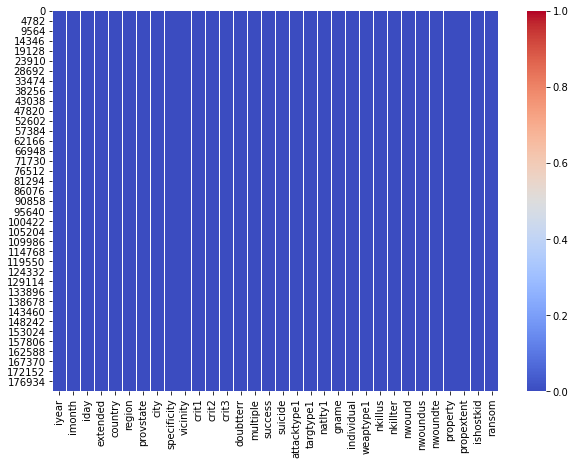

In [78]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap='coolwarm')

**Now we are dealing with CATEGORICAL columns**

In [80]:
cat_columns=[feature for feature in df.columns if df[feature].dtype == 'O']
for i in cat_columns:
  print(i)

provstate
city
gname


In [81]:
df.provstate.value_counts()

Baghdad                           7645
Northern Ireland                  4498
Unknown                           4290
Balochistan                       3710
Saladin                           3411
                                  ... 
Mtskheta-Mtianeti                    1
Karen (State)                        1
Port-of-Spain City Corporation       1
Meknes-Tafilalet                     1
Queretaro (State)                    1
Name: provstate, Length: 2855, dtype: int64

In [82]:
df.city.value_counts()

Unknown              9775
Baghdad              7589
Karachi              2652
Lima                 2359
Mosul                2265
                     ... 
Madhyabindu             1
Santo Tomas North       1
Mandirari               1
Siddiqabad              1
Kunar                   1
Name: city, Length: 36674, dtype: int64

In [85]:
df.gname.value_counts()

Unknown                                                           82782
Taliban                                                            7478
Islamic State of Iraq and the Levant (ISIL)                        5613
Shining Path (SL)                                                  4555
Farabundo Marti National Liberation Front (FMLN)                   3351
                                                                  ...  
Arnoldo Camu Command                                                  1
No Borders Group                                                      1
Abdul Qader Husseini Battalions of the Free Palestine movement        1
Mustafa Aktas Fighting Unit                                           1
Uganda Democratic Christian Army (UDCA)                               1
Name: gname, Length: 3537, dtype: int64

In [88]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
cat_feature=['provstate', 'city','gname']

for col in cat_feature:
  if col in df.columns:
    i=df.columns.get_loc(col) 
    df.iloc[:,i]=df.apply(lambda i: le.fit_transform(i.astype(str)),axis=0,result_type='expand')

In [89]:
df.head()

,iyear,imonth,iday,extended,country,region,provstate,city,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,natlty1,gname,individual,weaptype1,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom
0,1970,7,2,0,58,2,2056,22009,1.0,0,1,1,1,0.0,0.0,1,0,1,14,58.0,1907,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
1,1970,0,0,0,130,1,2615,13521,1.0,0,1,1,1,0.0,0.0,1,0,6,7,21.0,13,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,1.0,1.0
2,1970,1,0,0,160,5,1665,27244,4.0,0,1,1,1,0.0,0.0,1,0,1,10,217.0,3408,0,13,0.0,0.0,0.0,0.0,0.0,0,3.0,0.0,0.0
3,1970,1,0,0,78,8,935,16814,1.0,0,1,1,1,0.0,0.0,1,0,3,7,217.0,3408,0,6,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0
4,1970,1,0,0,101,4,2644,1408,1.0,0,1,1,1,-9.0,0.0,1,0,7,7,217.0,3408,0,8,0.0,0.0,0.0,0.0,0.0,1,3.0,0.0,0.0


In [90]:
df.isnull().any()

iyear          False
imonth         False
iday           False
extended       False
country        False
region         False
provstate      False
city           False
specificity    False
vicinity       False
crit1          False
crit2          False
crit3          False
doubtterr      False
multiple       False
success        False
suicide        False
attacktype1    False
targtype1      False
natlty1        False
gname          False
individual     False
weaptype1      False
nkillus        False
nkillter       False
nwound         False
nwoundus       False
nwoundte       False
property       False
propextent     False
ishostkid      False
ransom         False
dtype: bool

In [91]:
for columns in df.columns:
  df[columns]=df[columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   iyear        181691 non-null  int64
 1   imonth       181691 non-null  int64
 2   iday         181691 non-null  int64
 3   extended     181691 non-null  int64
 4   country      181691 non-null  int64
 5   region       181691 non-null  int64
 6   provstate    181691 non-null  int64
 7   city         181691 non-null  int64
 8   specificity  181691 non-null  int64
 9   vicinity     181691 non-null  int64
 10  crit1        181691 non-null  int64
 11  crit2        181691 non-null  int64
 12  crit3        181691 non-null  int64
 13  doubtterr    181691 non-null  int64
 14  multiple     181691 non-null  int64
 15  success      181691 non-null  int64
 16  suicide      181691 non-null  int64
 17  attacktype1  181691 non-null  int64
 18  targtype1    181691 non-null  int64
 19  natlty1      181691 non

In [92]:
df.to_csv('/content/mydrive/MyDrive/Colab Notebooks 2/Terrorist Prediction/Cleaned Data.csv')